In [151]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings


warnings.filterwarnings('ignore')

In [152]:
# training data
train_docs = pd.read_csv("C://Users/dell/Downloads/train.csv") 
#train_docs

In [153]:
train_docs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
train_docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [155]:
train_docs.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Cleaning the Data

In [156]:
#miss = train_docs[['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']]
train_docs.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [157]:
#filtering the numerical columns in the dataset
num_colmns=train_docs.select_dtypes(include=np.number).columns 
num_colmns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [158]:
#filtering the numerical columns in the dataset

cat_colmns=train_docs.select_dtypes(include=np.object).columns 
cat_colmns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [159]:
# dropping the 'GarageYrBlt' from cat_colmns as it's a date variable
#cat_colmns = cat_colmns.drop('GarageYrBlt')

## Checking the null values

In [160]:
train_docs.isnull().sum()/len(train_docs.index)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

For categorical variables, null values seems to be meaningful. Hence we'll substitute the null vales with a category called "Not Applicable"

In [161]:
train_docs[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageCond']]=train_docs[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageCond']].replace(np.nan,'Not Applicable')

In [162]:
train_docs[cat_colmns].isnull().sum()*100/len(train_docs)

MSZoning         0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.000000
GarageType       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageCond       0.000000
PavedDrive       0.000000
PoolQC      

In [163]:
train_docs[num_colmns].isnull().sum()*100/len(train_docs)

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [164]:
# converting the datatype to category
train_docs['MSSubClass']=train_docs['MSSubClass'].astype('category') 

In [165]:
# converting the datatype to category
train_docs['OverallQual']=train_docs['OverallQual'].astype('category') 
train_docs['OverallCond']=train_docs['OverallCond'].astype('category') 

In [166]:
# list of yearly information in the dataset 

dates=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold'] 

We can see the null values, hence we'll fill the missing number values

In [167]:
# replacing null values with median
train_docs['LotFrontage'].fillna(train_docs['LotFrontage'].median(),inplace=True) 
train_docs['MasVnrArea'].fillna(train_docs['MasVnrArea'].median(),inplace=True) 


In [168]:
# Let's fill the categorical missing values 

cat_col=['MasVnrType','Electrical']
for i in cat_col:
    train_docs[i].fillna(train_docs[i].mode()[0],inplace=True)

In [169]:
#Let's check the missing values count
train_docs[cat_col].isnull().sum() # count of missing values after replacing the null values


MasVnrType    0
Electrical    0
dtype: int64

In [170]:
# Now let's see the cound of null values in categorical variables
train_docs[cat_colmns].isnull().sum() 

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [171]:
# Let's check the null values count in year variable
train_docs[dates].isnull().sum() 


YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

It's obvious that garage built and year built is same, so let's replace the null values of Garage built with the Year built of that perticular house.
To calculate the age of the house, we can subtsract them from the current year 2023. 

Hence  we'll get the age of the house, garage, number of years before the re of the house and the number of years before the house was sold from now.

In [172]:
train_docs['GarageYrBlt'].fillna('100000',inplace=True)
train_docs[dates]=train_docs[dates].astype('int')
train_docs['house_age']=train_docs['YrSold']-train_docs['YearBuilt']
train_docs['Remodel']=train_docs['YrSold']-train_docs['YearRemodAdd']
train_docs['Garage_age']=train_docs['YrSold']-train_docs['GarageYrBlt']
train_docs['Garage_age'][train_docs['Garage_age']<-1]=-100

In [173]:
# Binning of 'credit_amount_bins'

bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
label = ['None','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
train_docs['Garage_age']=pd.cut(train_docs['Garage_age'],bins,labels=label)
train_docs['Garage_age'].astype('object')


0        0-10
1       30-40
2        0-10
3        0-10
4        0-10
        ...  
1455     0-10
1456    30-40
1457    60-70
1458    50-60
1459    40-50
Name: Garage_age, Length: 1460, dtype: object

In [174]:
train_docs.shape

(1460, 84)

In [175]:
len(train_docs.select_dtypes(include=np.number).columns)


37

In [176]:
len(train_docs.select_dtypes(include=np.object).columns)


43

In [177]:
set(train_docs.columns).difference(train_docs.select_dtypes(include=np.object).columns,train_docs.select_dtypes(include=np.number).columns)


{'Garage_age', 'MSSubClass', 'OverallCond', 'OverallQual'}

In [178]:
train_docs.select_dtypes(include=np.object).columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [179]:
# Let's drop the dates

train_docs.drop(dates,axis=1,inplace=True)


In [180]:
# Let's replace the month numbers with month names

train_docs['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
                       ,inplace=True) 


In [181]:
train_docs['MoSold']


0       Feb
1       May
2       Sep
3       Feb
4       Dec
       ... 
1455    Aug
1456    Feb
1457    May
1458    Apr
1459    Jun
Name: MoSold, Length: 1460, dtype: object

In [182]:
train_docs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age,Remodel,Garage_age
0,1,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Feb,WD,Normal,208500,5,5,0-10
1,2,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,...,Not Applicable,Not Applicable,0,May,WD,Normal,181500,31,31,30-40
2,3,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Sep,WD,Normal,223500,7,6,0-10
3,4,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Feb,WD,Abnorml,140000,91,36,0-10
4,5,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Dec,WD,Normal,250000,8,8,0-10


There are cases where the data in the columns is unevenly distributed, with one column more skewed than the others. We will identify multiple instances of this condition.

1. We will identify columns with only a single unique value and remove them.
2. We will identify columns with only two unique values and assess if the data is skewed towards one of them. If necessary, we will drop the column.
3. We will group the low-frequency values in a column together as 'others'."

In [183]:
#filtering the categorical features in cat_colmns
cat_colmns=train_docs.select_dtypes(exclude=np.number).columns 

In [184]:
# columns with 1 unique value
unique_val_cols = [col for col in cat_colmns if len(train_docs[col].unique()) == 1]
unique_val_cols

[]

Above we can see there is no column having single unique value

In [185]:
# columns with 2 unique values
unique_val2_cols = [col for col in cat_colmns if len(train_docs[col].unique()) == 2]
unique_val2_cols

['Street', 'Utilities', 'CentralAir']

Above we can see there are 2 columns having two unique value

In [186]:
# columns with 3 unique values
unique_val3_cols= [col for col in cat_colmns if len(train_docs[col].unique()) == 3]
unique_val3_cols

['Alley', 'LandSlope', 'PavedDrive']

Above we can see there are 3 columns having two unique value

In [187]:
# columns with 4 unique values
unique_val4_cols = [col for col in cat_colmns if len(train_docs[col].unique()) == 4]
unique_val4_cols

['LotShape',
 'LandContour',
 'MasVnrType',
 'ExterQual',
 'KitchenQual',
 'GarageFinish',
 'PoolQC']

In [188]:
# columns with 5 unique values
unique_val5_cols = [col for col in cat_colmns if len(train_docs[col].unique()) == 5]
unique_val5_cols

['MSZoning',
 'LotConfig',
 'BldgType',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'Electrical',
 'Fence',
 'MiscFeature']

In [189]:
# columns with more than 5 unique values
unique_val6_cols = [col for col in cat_colmns if len(train_docs[col].unique()) > 5]
unique_val6_cols

['MSSubClass',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'Garage_age']

Let's see the the distribution of the unique vales



In [190]:
#Let's check the value counts percentage for the remaining columns to check for skewness.
for col in unique_val2_cols:
    print(train_docs[col].value_counts(normalize=True)*100)
    print("*"*40)

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
****************************************
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
****************************************
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
****************************************


In [191]:
# let's check the value counts percentage for the remaining columns to check for skewness.
for col in unique_val3_cols:
    print(train_docs[col].value_counts(normalize=True)*100)
    print("*"*40)

Not Applicable    93.767123
Grvl               3.424658
Pave               2.808219
Name: Alley, dtype: float64
****************************************
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
****************************************
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
****************************************


In [192]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in unique_val4_cols:
    print(train_docs[col].value_counts(normalize=True)*100)
    print("*"*40)

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
****************************************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
****************************************
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
****************************************
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
****************************************
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
****************************************
Unf               41.438356
RFn               28.904110
Fin               24.109589
Not Applicable     5.547945
Name: GarageFinish, dtype: float64
****************************************
Not Applicable    99.520548
Gd                 0.205479
Ex                 0.136986
Fa         

In [193]:
# let's get the value counts percentage for the remaining columns to check for skewness.
for col in unique_val5_cols:
    print(train_docs[col].value_counts(normalize=True)*100)
    print("*"*40)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
****************************************
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
****************************************
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64
****************************************
TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64
****************************************
TA                44.452055
Gd                42.328767
Ex                 8.287671
Not Applicable     2.534247
Fa                 2.397260
Name: BsmtQual, dtype: float64
****************************************
TA                89.794521
Gd                 4.452055
Fa                 3.082192
Not Applicable     2.534

In [194]:
#Let's check the value counts percentage for the remaining columns to check for skewness.
for col in unique_val6_cols:
    print(train_docs[col].value_counts(normalize=True)*100)
    print("*"*40)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
****************************************
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
****************************************
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn      

#### Based on the results above, some columns show a significant bias towards one particular variable. Including these columns in future analyses would not only complicate the model but also compromise the accuracy of our queries. Therefore, we have decided to exclude these columns from our analysis.

In [195]:
# Let's drop the highly skewed columns 
train_docs.drop(['Id','Street', 'Utilities', 'CentralAir','Alley', 'LandSlope', 'PavedDrive','LandContour'
,'BsmtCond','PoolQC','BldgType','ExterCond','Electrical','Fence','MiscFeature','Condition1','Condition2','RoofMatl',
'BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType',"SaleCondition"],axis=1,inplace=True)

In [196]:
train_docs.shape

(1460, 55)

For some columns, the distribution is very small for some variables, so, we combine all the low frequency attributes and combine as one, called as 'others'.



In [197]:
# Let's combine all the low frequency attributes and name it as 'others'
train_docs['LotShape'] = train_docs['LotShape'].replace(['IR1','IR2','IR3'], 'others')
train_docs['MasVnrType'] = train_docs['MasVnrType'].replace(['Stone','BrkCmn'], 'others')

train_docs['BsmtQual'] = train_docs['BsmtQual'].replace(['Not Applicable','Ex','Fa'], 'others')
train_docs['BsmtExposure'] = train_docs['BsmtExposure'].replace(['Not Applicable','Av','Gd','Mn'], 'others')
train_docs['KitchenQual'] = train_docs['KitchenQual'].replace(['Ex','Fa'], 'others')

train_docs['MSZoning'] = train_docs['MSZoning'].replace(['RM','FV','RH','C (all)'], 'others')
train_docs['LotConfig'] = train_docs['LotConfig'].replace(['Corner','CulDSac','FR2','FR3'], 'others')
train_docs['HouseStyle'] = train_docs['HouseStyle'].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'others')
train_docs['RoofStyle'] = train_docs['RoofStyle'].replace(['Hip','Flat','Gambrel','Mansard','Shed'], 'others')
train_docs['Exterior1st'] = train_docs['Exterior1st'].replace(['Plywood','CemntBd','BrkFace','WdShing',
                                                   'Stucco','AsbShng','Stone','BrkComm', 'AsphShn','CBlock','ImStucc' ], 'others')
train_docs['Exterior2nd'] = train_docs['Exterior2nd'].replace(['Plywood','CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'], 'others')
train_docs['Foundation'] = train_docs['Foundation'].replace(['BrkTil','Slab','Stone','Wood'], 'others')
train_docs['BsmtFinType1'] = train_docs['BsmtFinType1'].replace(['Not Applicable','BLQ','Rec','LwQ'], 'others')
train_docs['HeatingQC'] = train_docs['HeatingQC'].replace(['Gd','Fa','Po'], 'others')
train_docs['FireplaceQu'] = train_docs['FireplaceQu'].replace(['Fa','Ex','Po'], 'others')
train_docs['GarageType'] = train_docs['GarageType'].replace(['BuiltIn','Not Applicable','BuitIn','Basement','Basment','CarPort','2Types'], 'others')


In [198]:
#Let's combine other low frequency attributes 
train_docs['OverallCond'] = train_docs['OverallCond'].replace([1,2,3,4], 'Poor')
train_docs['OverallQual'] = train_docs['OverallQual'].replace([1,2,3,4], 'Poor')
train_docs['OverallQual'] = train_docs['OverallQual'].replace([9,10], 'Excellent')
train_docs['OverallCond'] = train_docs['OverallCond'].replace([8,9,10], 'Excellent')
train_docs['ExterQual'] = train_docs['ExterQual'].replace(['Ex','Fa'], 'Gd')

In [199]:
# filtering the categorical columns
cat_colmns=train_docs.select_dtypes(include=np.object).columns 
len(cat_colmns)


20

In [200]:
# filtering the numerical columns
num_colmns=train_docs.select_dtypes(include=np.number).columns 

In [201]:
len(num_colmns)

31

In [202]:
#Let's create a dataframe with only numerical columns
num_data=train_docs[num_colmns].copy() 
num_data.columns 



Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'house_age', 'Remodel'],
      dtype='object')

In [203]:
cat_colmns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold'],
      dtype='object')

In [204]:
num_data.shape

(1460, 31)

In [205]:
# creating a dataframe with categorical features
cat_data=train_docs[cat_colmns].copy() 

In [206]:
cat_data[['Garage_age', 'MSSubClass', 'OverallCond', 'OverallQual']]=train_docs[['Garage_age', 'MSSubClass', 
                                                                                 'OverallCond', 'OverallQual']].copy()


In [207]:
cat_data.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,MoSold,Garage_age,MSSubClass,OverallCond,OverallQual
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,Ex,Gd,Not Applicable,Attchd,RFn,Feb,0-10,60,5,7
1,RL,Reg,others,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,...,Ex,TA,TA,Attchd,RFn,May,30-40,20,Excellent,6
2,RL,others,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,Ex,Gd,TA,Attchd,RFn,Sep,0-10,60,5,7
3,RL,others,others,Crawfor,2Story,Gable,Wd Sdng,others,None,TA,...,others,Gd,Gd,Detchd,Unf,Feb,0-10,70,5,7
4,RL,others,others,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,Ex,Gd,TA,Attchd,RFn,Dec,0-10,60,5,8


## EXPLORATORY DATA ANALYSIS

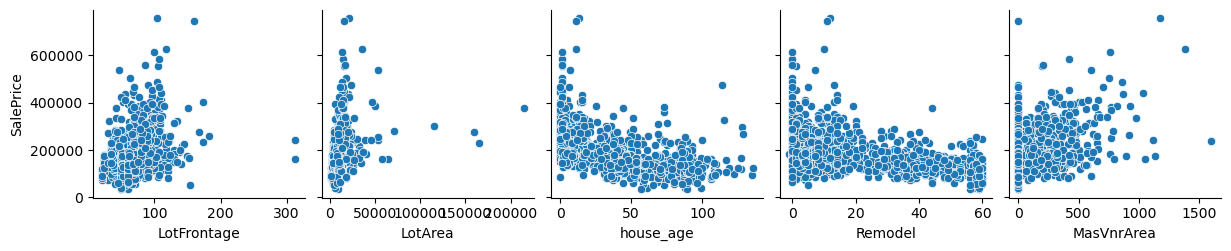

In [208]:
sns.pairplot(x_vars=['LotFrontage', 'LotArea', 'house_age', 'Remodel', 'MasVnrArea'],y_vars='SalePrice',data=num_data)
plt.show()


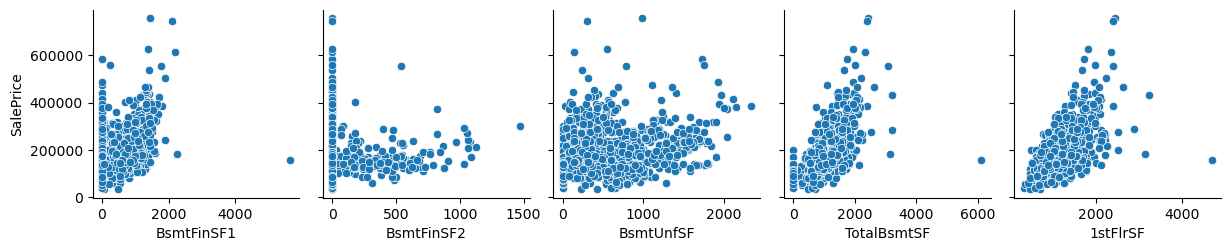

In [209]:
sns.pairplot(x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'],y_vars='SalePrice',data=num_data)
plt.show()


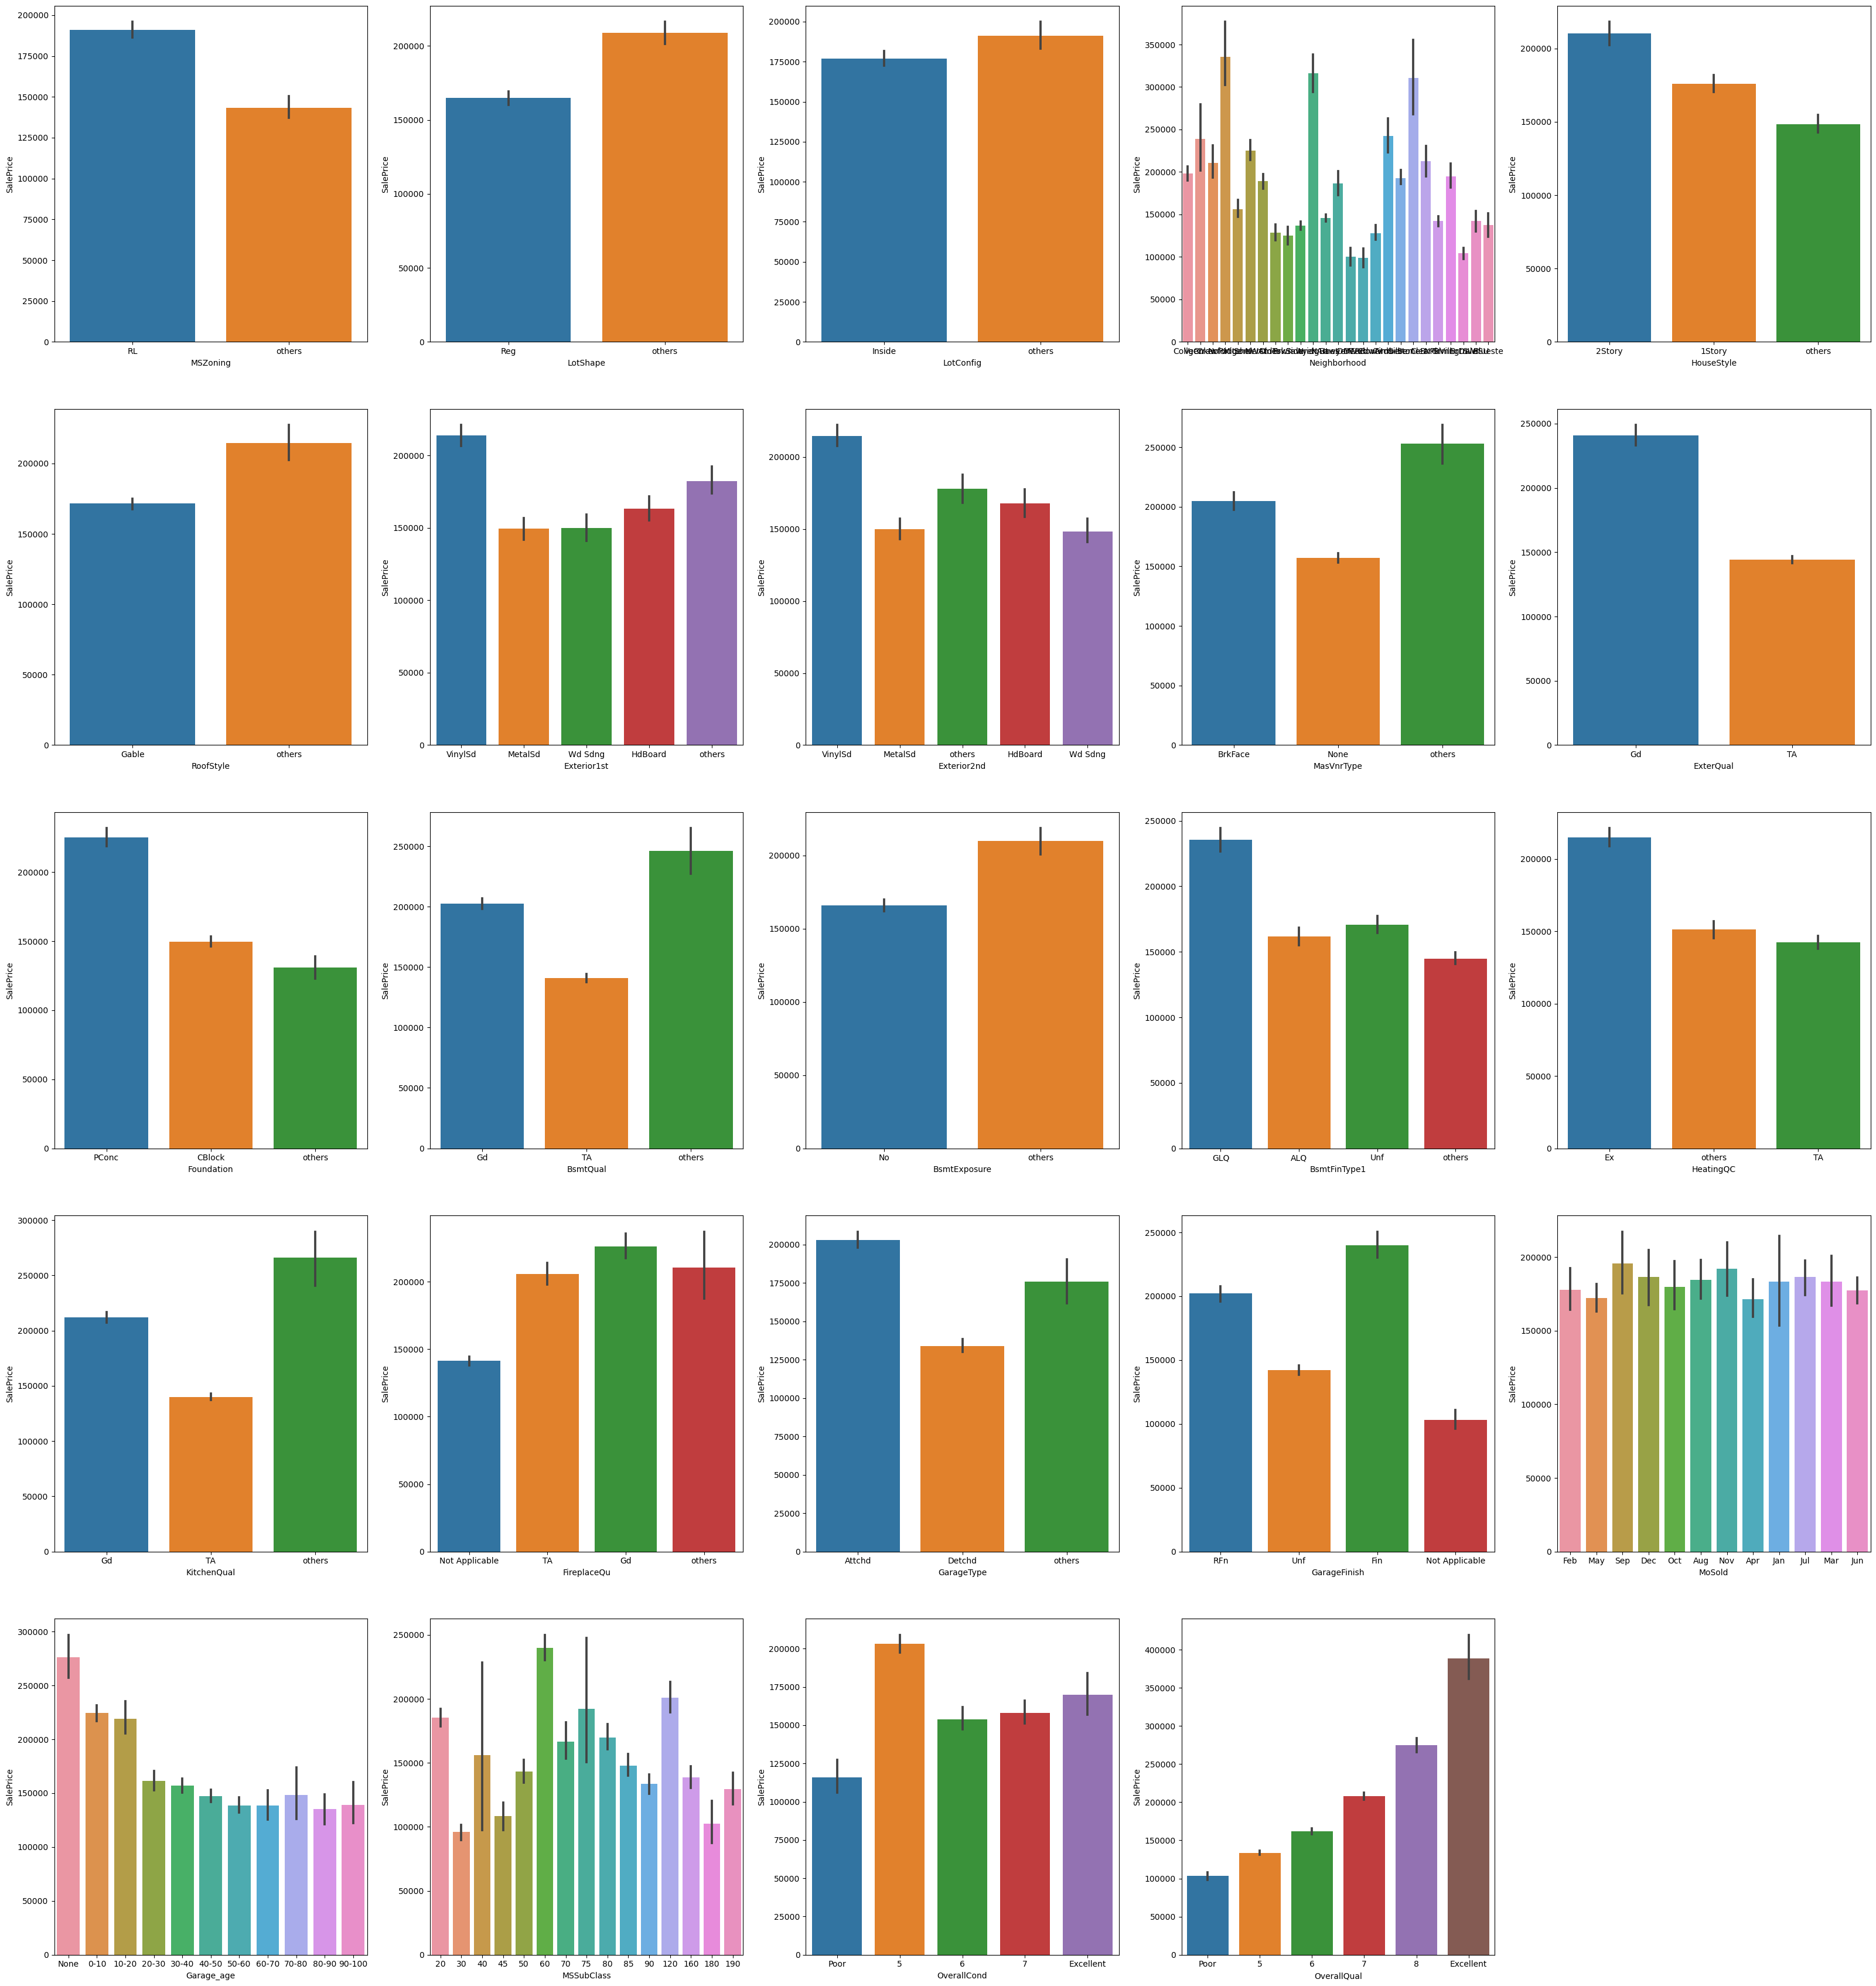

In [210]:
plt.figure(figsize=(40,70))
k = 1
for i in cat_data.columns:
    plt.subplot(8,5,k)
    sns.barplot(x=cat_data[i],y=num_data['SalePrice'])
    k+=1


The above graphs depict the distribution of various categorical columns


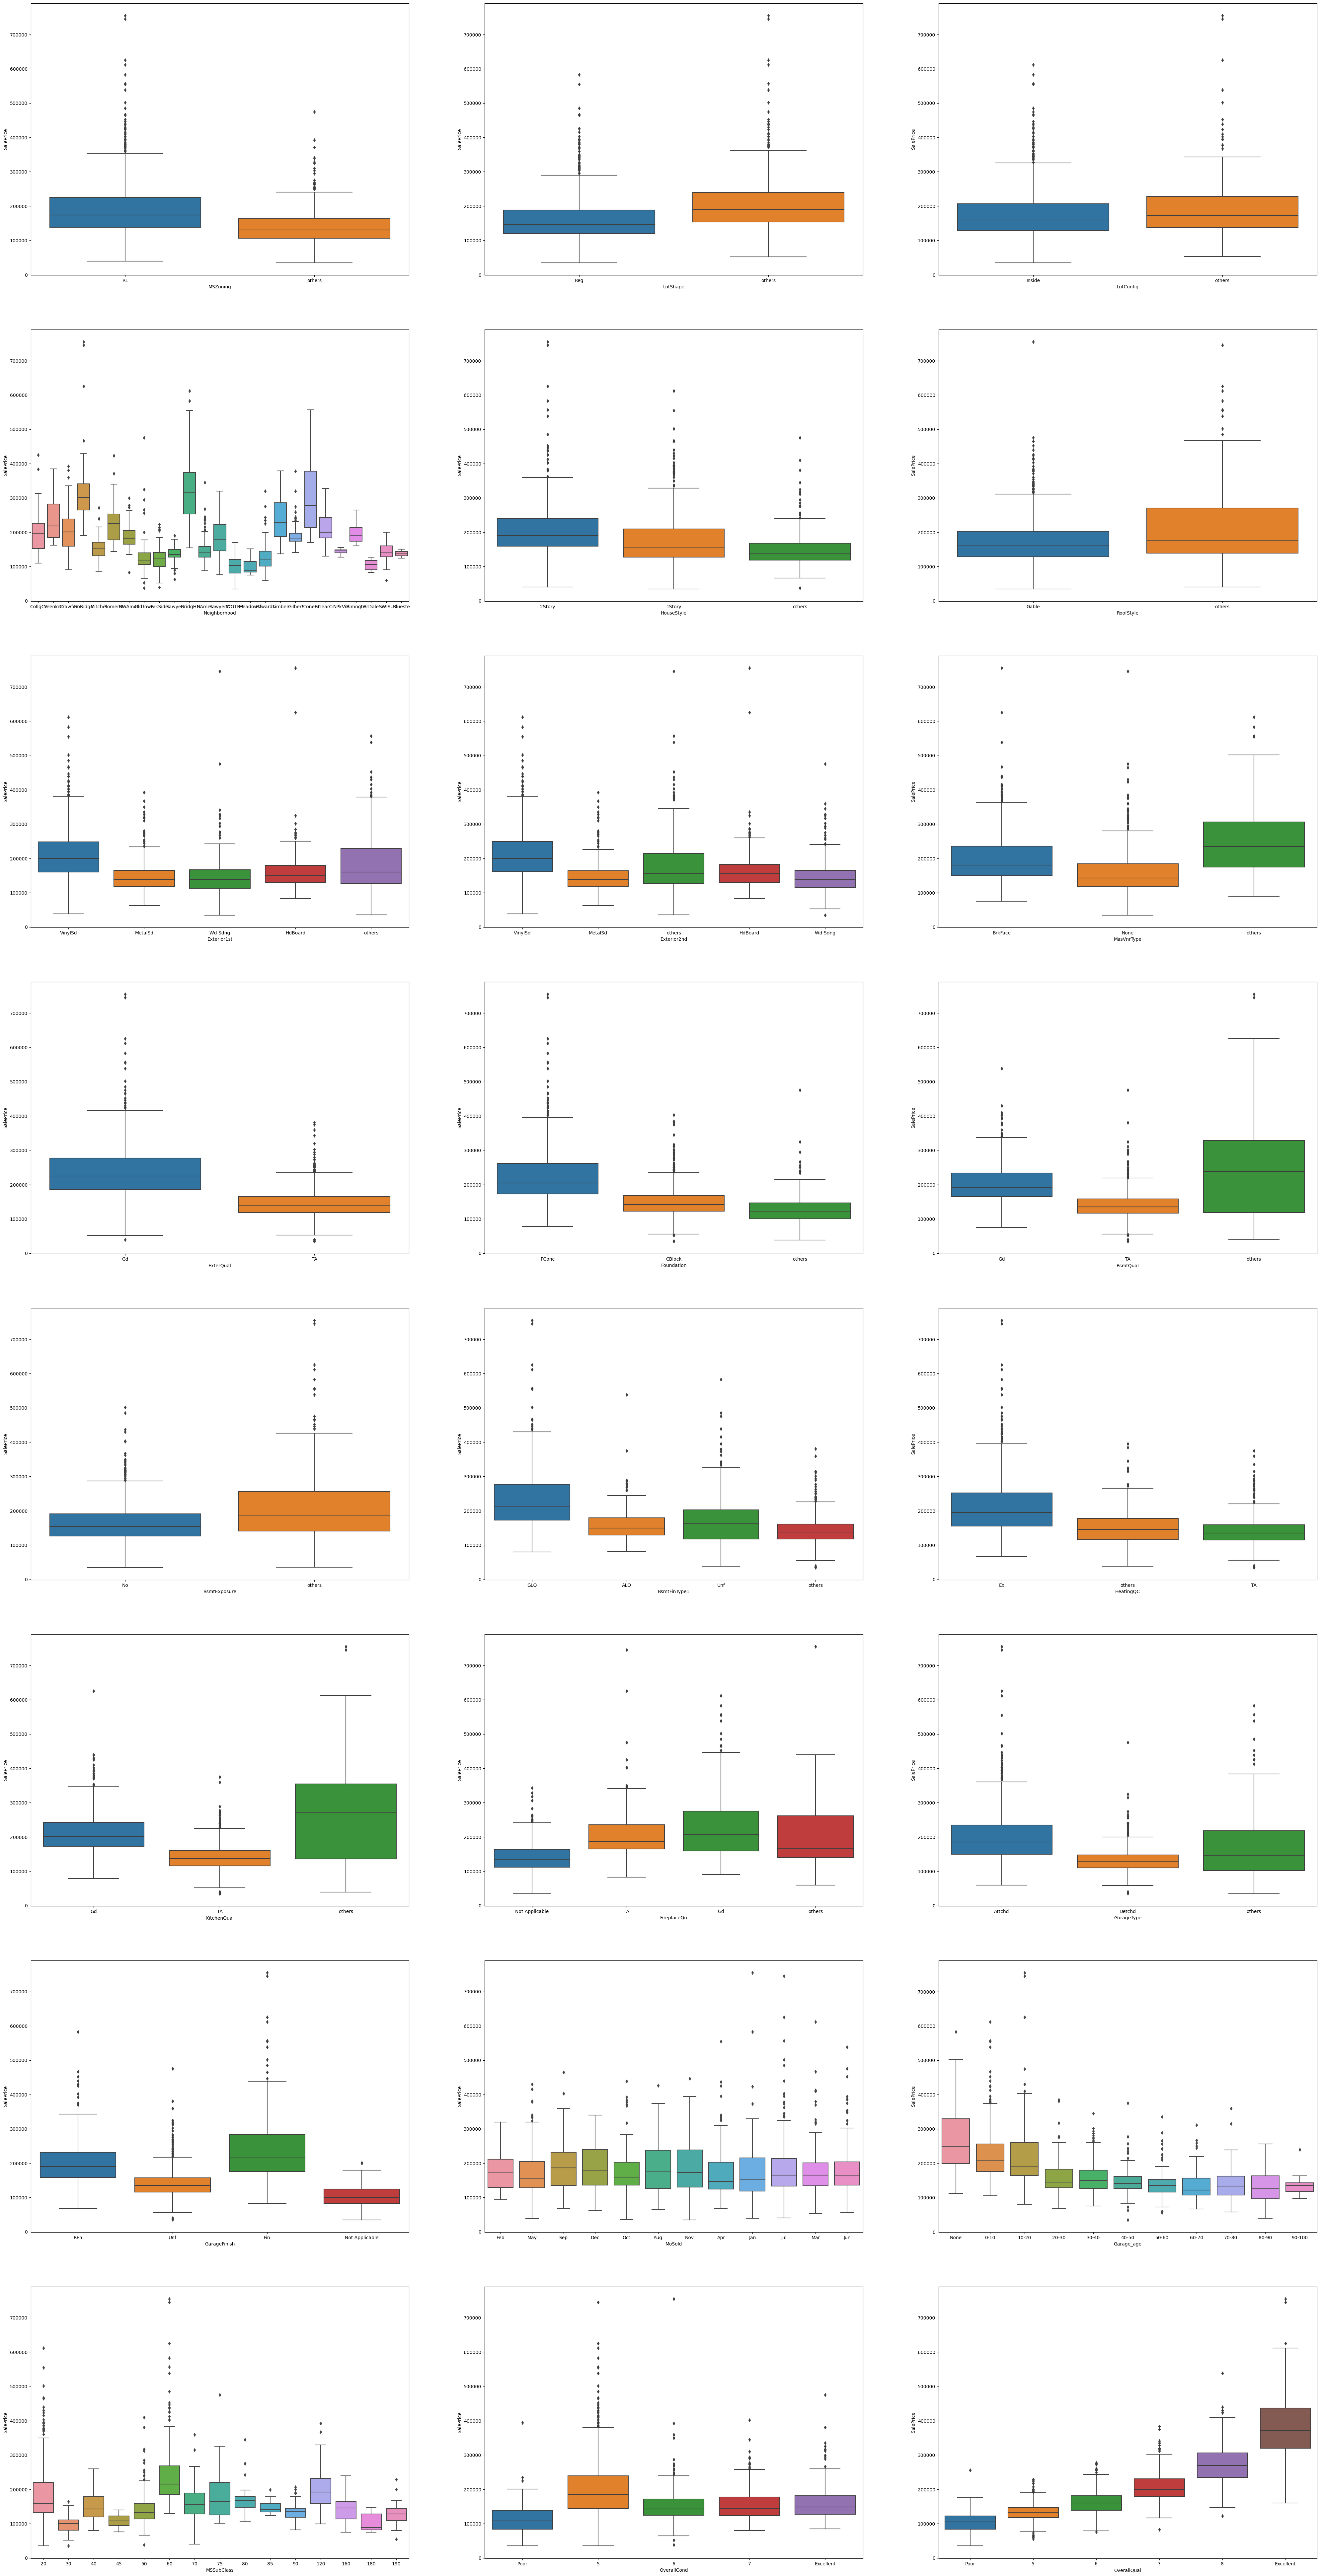

In [211]:
plt.figure(figsize=(50,100))
j=1
for i in cat_data.columns:
    plt.subplot(8,3,j)
    sns.boxplot(x=i,y='SalePrice',data=train_docs)
    j+=1

It's crucial that the target variable follows a normal distribution.

Dealing with outliers depends on whether the data is normally distributed or not. The effectiveness of hypothesis testing also relies on this.

So, we use QQ plots to see how closely our data resembles a normal distribution.

Text(0.5, 1.0, 'Distribution of SalePrice')

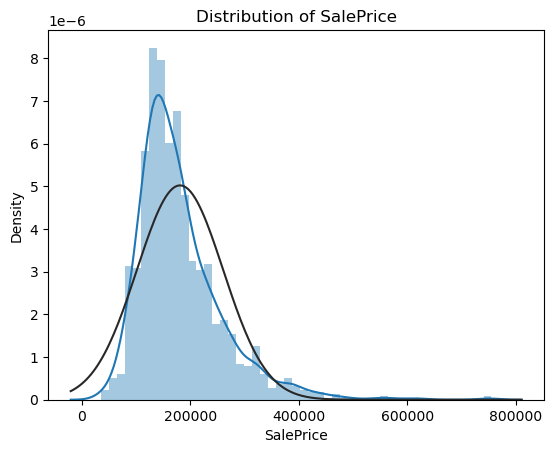

In [212]:
 # distribution of SalePrice column
sns.distplot(num_data['SalePrice'],fit=norm)
plt.title('Distribution of SalePrice')

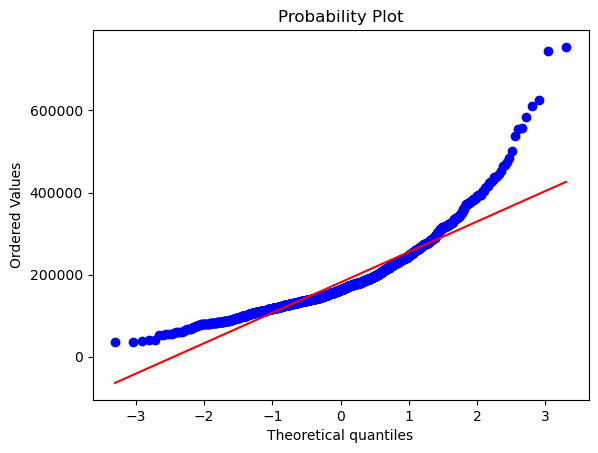

In [213]:
# QQ plot for SalePrice
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)
plt.show() 

The figures above shows that the SalePrice data doesn't follow a perfect normal distribution and exhibits noticeable skewness. To address this issue, we apply the logarithm function to the column and subsequently conduct a QQ plot.

Furthermore, there's evident skewness in the distribution of the SalePrice Variable. Therefore, we anticipate that after applying the logarithmic function, this skewness will likely decrease.

In [214]:
# skewness of SalePricce
num_data['SalePrice'].skew() 

1.8828757597682129

In [215]:
# applying log to SalePrice column

num_data['SalePrice'] = np.log1p(num_data["SalePrice"])

Text(0.5, 1.0, 'Distribution of SalePrice')

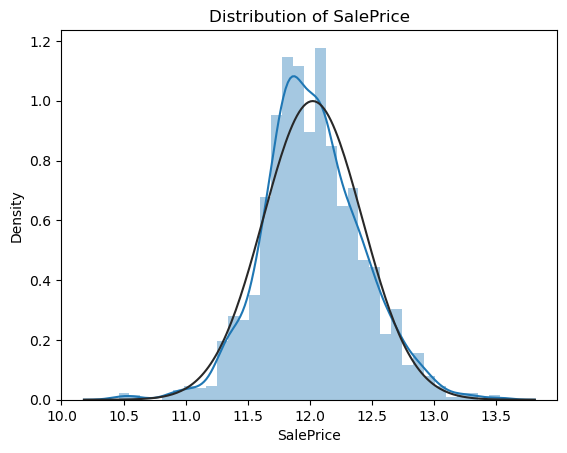

In [216]:
sns.distplot(num_data['SalePrice'],fit=norm)
plt.title('Distribution of SalePrice') # distribution of SalePrice column


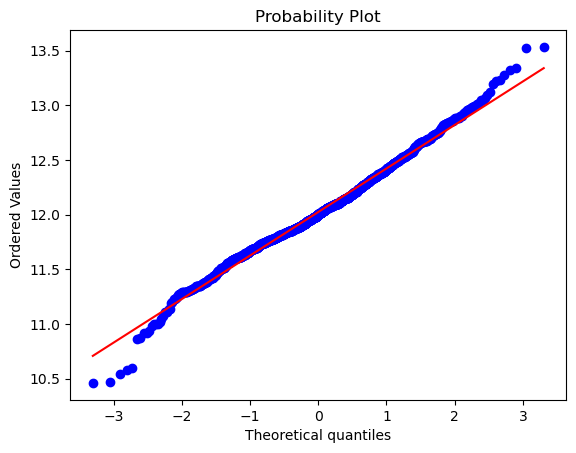

In [217]:
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)
plt.show() # QQ plot of SalePrice column


In [218]:
# skewness of SalePrice column
num_data['SalePrice'].skew() 


0.12134661989685333

Upon applying the logarithmic function to the SalePrice column, it becomes apparent that the distribution of the data more closely resembles a normal distribution curve. Additionally, the previously observed skewness has significantly decreased.

In data analysis, it's advantageous when multiple columns can be explained or represented by a single column. In this context, we can consider using the TotalSF column, which represents the sum of TotalBsmtSF, 1stFlrSF, and 2ndFlrSF, as it can potentially provide a consolidated and informative representation of the data in these multiple columns.

In [219]:
num_data['TotalSF'] = num_data['TotalBsmtSF'] + num_data['1stFlrSF'] + num_data['2ndFlrSF']

In [220]:
#Let's drop the TotalBsmtSF, 1stFlrSF, and 2ndFlrSF columns as we have 'TotalSF' column
num_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True) 

We cannot directly input categorical data into the model. Given the presence of numerous categorical features, we use a technique called one-hot encoding to create dummy variables for all the categorical data. This approach enables the model to effectively utilize categorical information in its analysis.


In [221]:
# creating dummy variables for categorical data
dummy_data=pd.get_dummies(train_docs[cat_data.columns]) 

In [222]:
dummy_data.head() 

,MSZoning_RL,MSZoning_others,LotShape_Reg,LotShape_others,LotConfig_Inside,LotConfig_others,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_Excellent,OverallQual_Poor,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Excellent
0,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [224]:
#dropping the unwanted columns from the dummy_data dataframe
dummy_data.drop(['MSZoning_others', 'LotConfig_others', 'HouseStyle_others',
       'RoofStyle_others', 'Exterior1st_others', 'Exterior2nd_others', 'MasVnrType_others', 'ExterQual_Gd',
       'Foundation_others', 'BsmtQual_others', 'BsmtExposure_others', 'BsmtFinType1_others', 'HeatingQC_others',
       'KitchenQual_others', 'FireplaceQu_others', 'GarageType_others'],axis=1,inplace=True)


In [229]:
#dropping the extra unwanted columns from the dummy_data dataframe
dummy_data.drop(['Neighborhood_Blmngtn','GarageFinish_Not Applicable','Garage_age_None', 'MSSubClass_20', 
                 'OverallCond_Poor', 'OverallQual_Poor'],axis=1,inplace=True)

In [230]:
dummy_data.head() 

,MSZoning_RL,LotShape_Reg,LotShape_others,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,MSSubClass_190,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_Excellent,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Excellent
0,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [231]:
# concatnating the numerical data and categorical data
df=pd.concat([num_data,dummy_data],axis=1) 

In [232]:
df.shape

(1460, 136)

In [233]:
df.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'MSSubClass_190', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_Excellent', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_Excellent'],
      dtype='object', length=136)

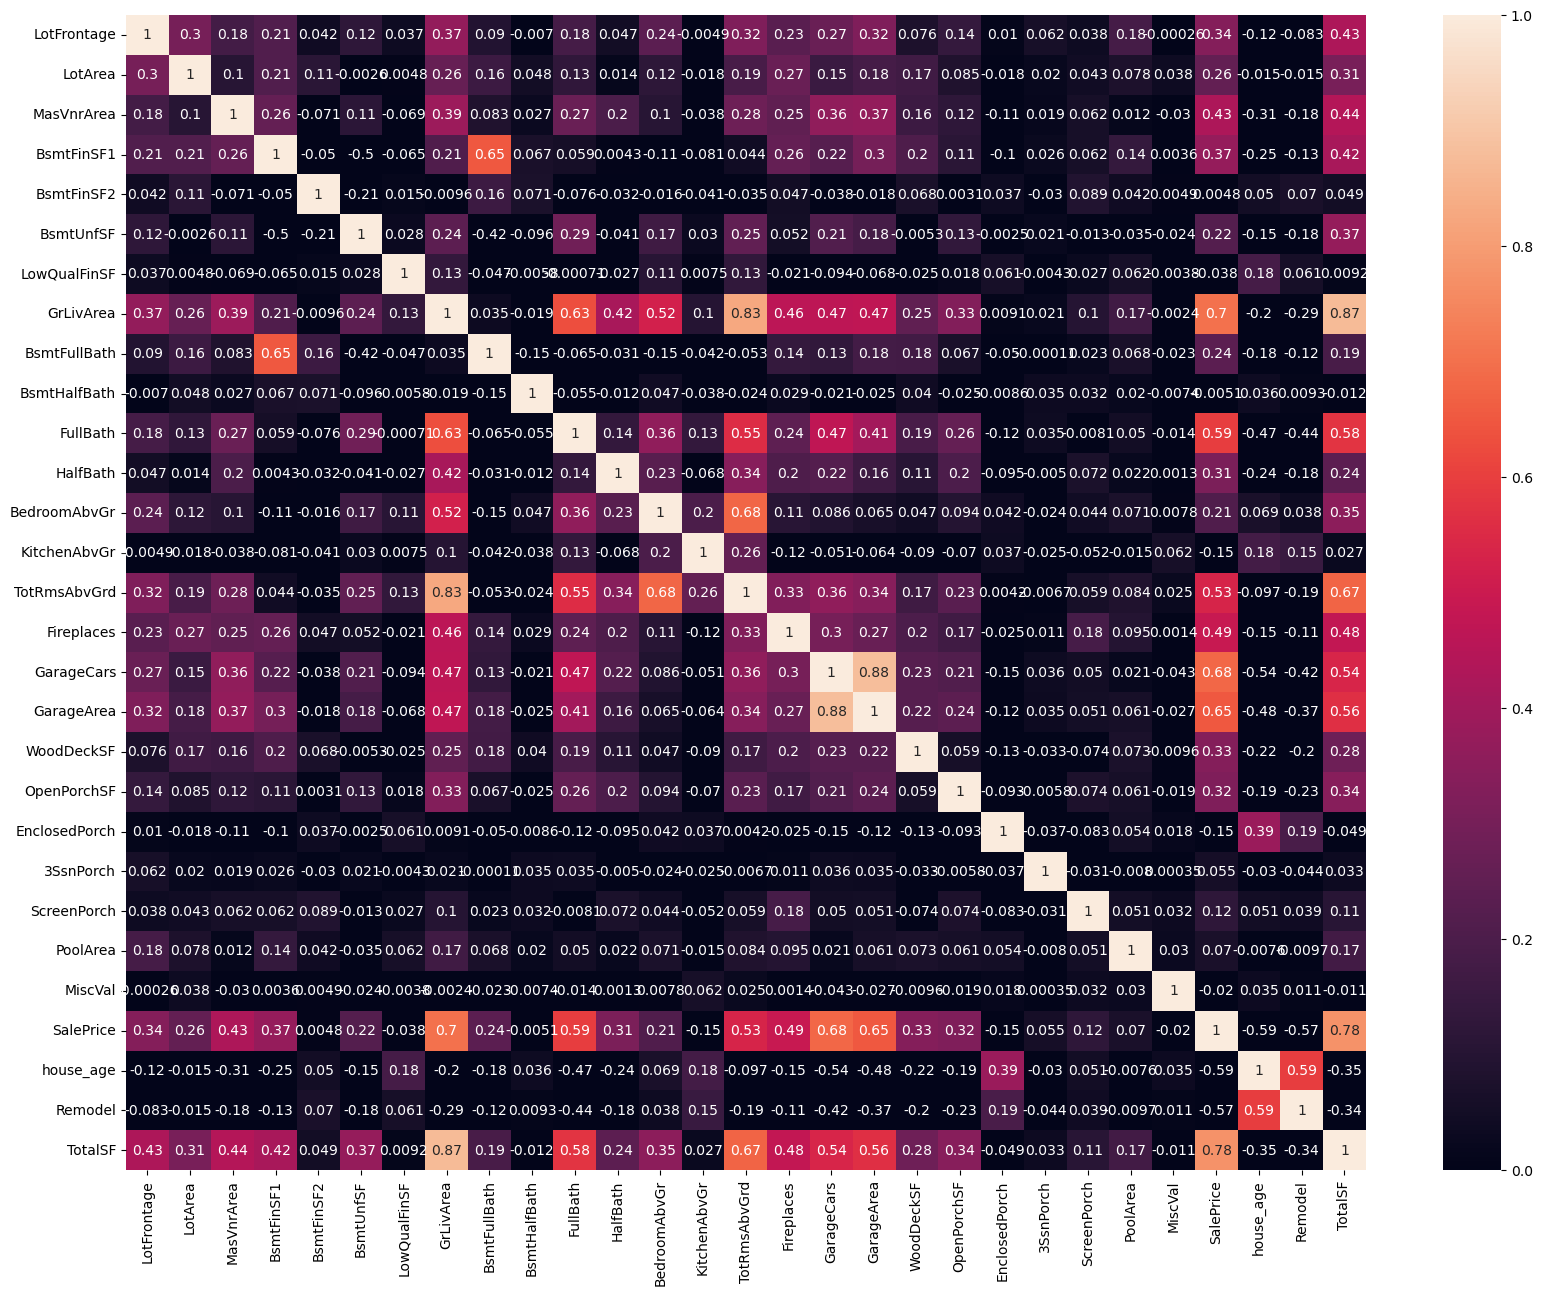

In [235]:
# heatmap of correlation coefficients 
plt.figure(figsize=(20,15))
sns.heatmap(num_data.corr(),annot=True,vmin=0) 
plt.show()

## Analysing the Outliers

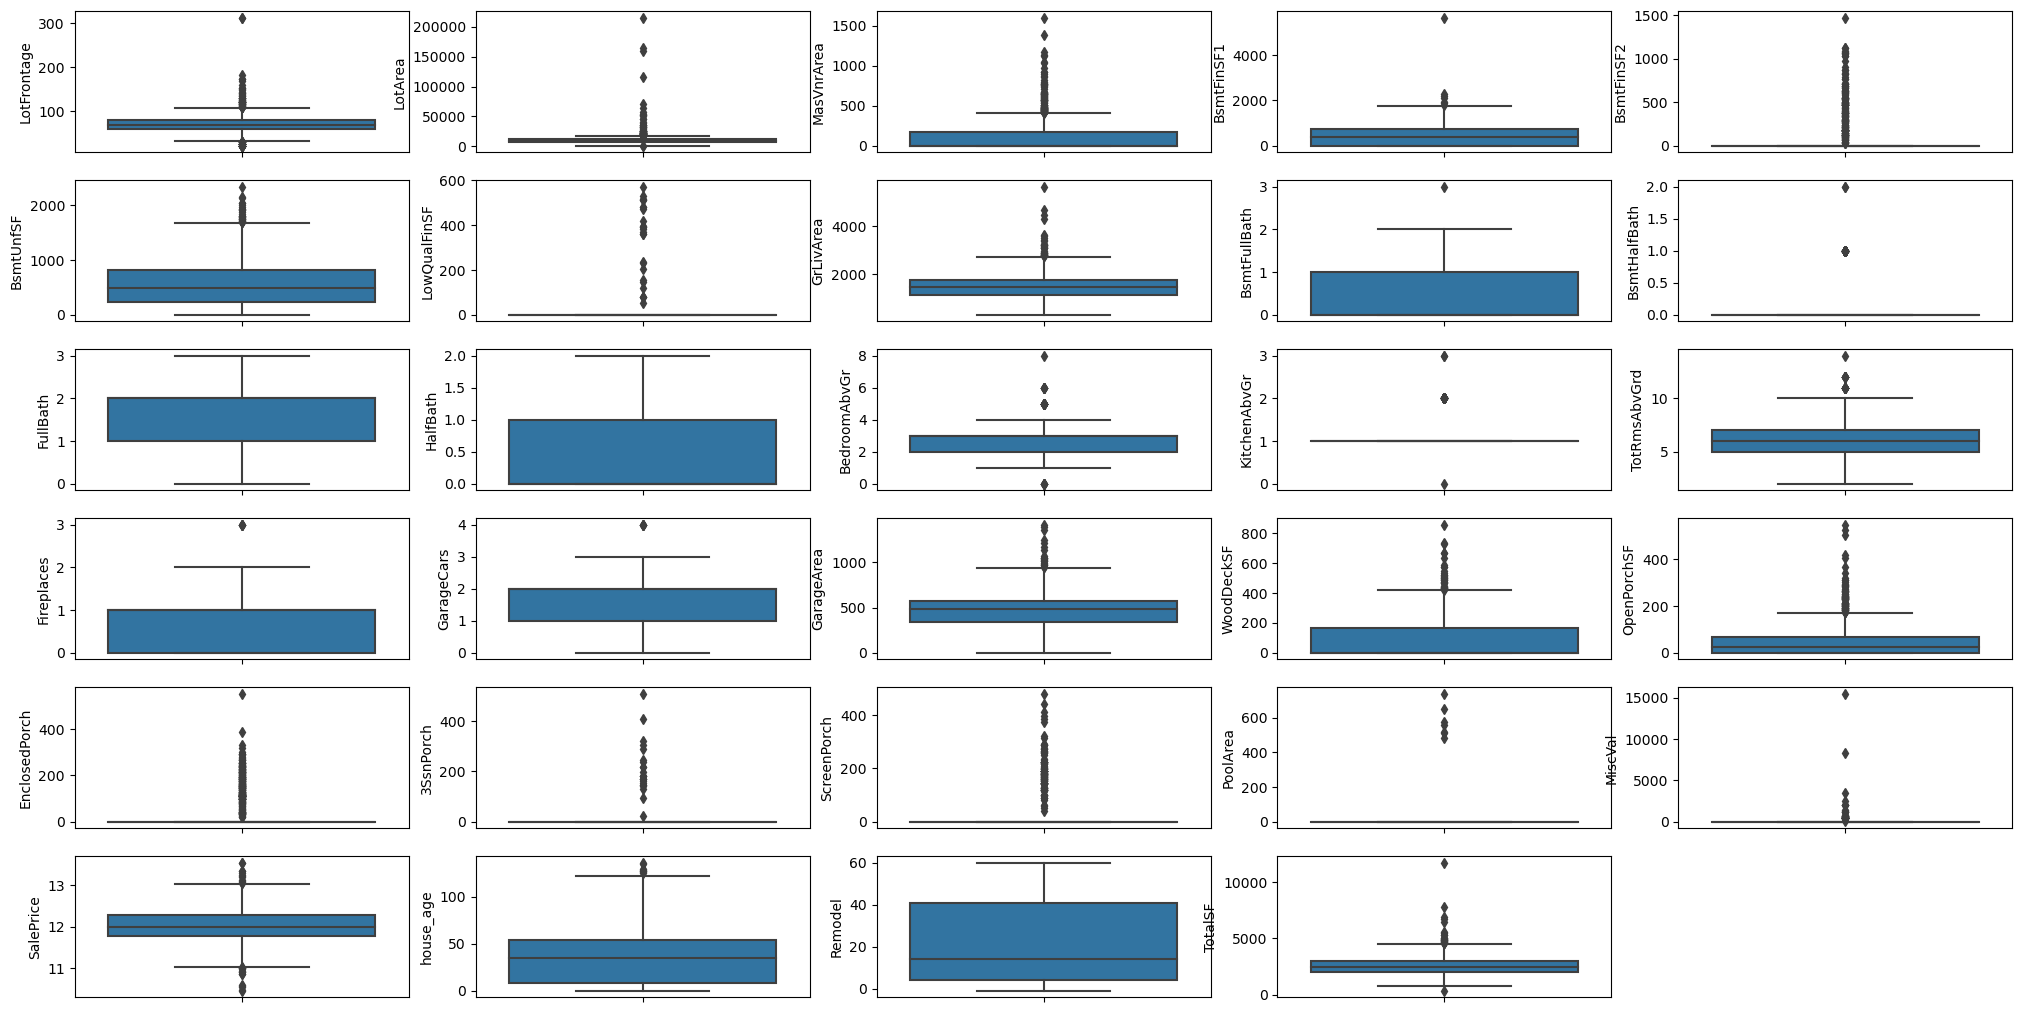

In [236]:
plt.figure(figsize=(25,15))
for i in enumerate(num_data.columns): 
    ax = plt.subplot(7, 5, i[0]+1)
    sns.boxplot(y=i[1], data=num_data)
plt.show()

We can observe some outliers in the above graphs, but as the data in the dataframe is very limited, we don't eliminate the outliers



## Training & Tesing data

In [237]:
 #Split the data into train and test
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42) #


## Data Scaling

Scaling is an important step in the data pre-processing of the model. It helps us in analysing the data more easily. Since, the range of features vary widely, scaling is used to limit or set the values in a certain range. This helps us in analysing the data better because all the features has the values in certain range.

In [238]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

Here, Scaling is applied to only the numerical data in the dataset



In [239]:
# scaling the numerical columns in the train data
df_train[num_data.columns]=scaler.fit_transform(df_train[num_data.columns]) 

In [240]:
#transforming the test data
df_test[num_data.columns]=scaler.transform(df_test[num_data.columns]) 


In [241]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,MSSubClass_190,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_Excellent,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Excellent
1452,-1.523875,-0.624089,-0.143650,0.218347,-0.280483,-1.280843,-0.120373,-0.860896,1.111135,-0.247791,...,0,1,0,0,0,1,0,0,0,0
762,0.082045,-0.185863,-0.607545,-0.919206,-0.280483,0.362572,-0.120373,0.033726,-0.814958,-0.247791,...,0,1,0,0,0,0,0,1,0,0
932,0.602884,0.081575,1.143660,-0.971407,-0.280483,2.996077,-0.120373,0.707989,-0.814958,-0.247791,...,0,1,0,0,0,0,0,0,0,1
435,-1.176649,-0.006953,-0.607545,-0.134012,1.994578,-1.123686,-0.120373,0.248436,1.111135,-0.247791,...,0,0,1,0,0,0,0,1,0,0
629,0.516078,-0.152323,0.894316,0.385826,1.941670,-0.634254,-0.120373,-0.337307,1.111135,-0.247791,...,0,1,0,0,0,0,1,0,0,0


In [242]:
# assigning X_train and y_train
X_train=df_train.drop('SalePrice',axis=1)
y_train=df_train['SalePrice']


In [243]:
# assigning X_test and y_test
X_test=df_test.drop('SalePrice',axis=1)
y_test=df_test['SalePrice']


In [244]:
X_train.shape 

(1021, 135)

In [245]:
X_test.shape 

(439, 135)

In [246]:
y_train.shape 

(1021,)

In [247]:
y_test.shape

(439,)

## Feature Selection using RFE
We train the Logistic Regression model using the x-train and y-train datasets, employing Recursive Feature Elimination (RFE). RFE is a method that iteratively removes features, constructs models with the remaining attributes, and assesses model accuracy. This process helps determine which combination of attributes significantly contributes to predicting the target variable.

In [248]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Run RFE with 25 variables as output

# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,  n_features_to_select=25, step=1)
rfe = rfe.fit(X_train, y_train)

In [249]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 61),
 ('LotArea', False, 62),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', False, 45),
 ('BsmtFinSF2', False, 59),
 ('BsmtUnfSF', False, 46),
 ('LowQualFinSF', False, 58),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 22),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 28),
 ('HalfBath', False, 30),
 ('BedroomAbvGr', False, 84),
 ('KitchenAbvGr', False, 24),
 ('TotRmsAbvGrd', False, 23),
 ('Fireplaces', False, 74),
 ('GarageCars', False, 19),
 ('GarageArea', False, 107),
 ('WoodDeckSF', False, 82),
 ('OpenPorchSF', False, 103),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 86),
 ('ScreenPorch', False, 64),
 ('PoolArea', False, 98),
 ('MiscVal', False, 89),
 ('house_age', True, 1),
 ('Remodel', False, 42),
 ('TotalSF', False, 44),
 ('MSZoning_RL', False, 75),
 ('LotShape_Reg', False, 26),
 ('LotShape_others', False, 27),
 ('LotConfig_Inside', False, 71),
 ('Neighborhood_Blueste', False, 7),
 ('Neighborhood_BrDale', False, 36),
 ('Neighborhood_BrkSi

In [250]:
# RFE selected columns/features
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['GrLivArea', 'house_age', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_Excellent', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_Excellent'],
      dtype='object')

In [251]:
X_train_new=X_train[rfe_col].copy()

## VIF
This concept pertains to the relationships among predictor variables, indicating predictors that are correlated with one another.

We quantify this correlation using the Variance Inflation Factor (VIF), calculated by the formula VIF = 1 / (1 - R^2).

When the VIF is less than or equal to 1, it signifies no significant correlation.

VIF values between 1 and 5 indicate a moderate level of correlation.

VIF values exceeding 5 suggest a high degree of correlation.

In [252]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending= False)
    return vif

In [253]:
calculate_vif(X_train_new)

,Features,VIF
16,OverallCond_5,9.78
12,GarageFinish_Unf,6.55
11,GarageFinish_RFn,5.86
10,GarageFinish_Fin,5.42
22,OverallQual_7,5.24
21,OverallQual_6,4.84
23,OverallQual_8,4.19
20,OverallQual_5,4.01
17,OverallCond_6,3.56
18,OverallCond_7,3.14


In [254]:
#dropping high VIF value columns
X_train_new.drop('OverallCond_5',axis=1,inplace=True) 

In [255]:
calculate_vif(X_train_new)

,Features,VIF
12,GarageFinish_Unf,5.05
11,GarageFinish_RFn,4.65
21,OverallQual_7,4.40
10,GarageFinish_Fin,4.35
20,OverallQual_6,4.06
22,OverallQual_8,3.65
19,OverallQual_5,3.46
1,house_age,2.42
23,OverallQual_Excellent,2.38
0,GrLivArea,1.71


In [256]:
#dropping high VIF value columns
X_train_new.drop('GarageFinish_Unf',axis=1,inplace=True) 

In [257]:
calculate_vif(X_train_new)

,Features,VIF
10,GarageFinish_Fin,2.53
11,GarageFinish_RFn,2.43
21,OverallQual_8,2.41
1,house_age,2.28
20,OverallQual_7,2.24
19,OverallQual_6,2.05
22,OverallQual_Excellent,1.90
18,OverallQual_5,1.69
0,GrLivArea,1.64
5,Neighborhood_NridgHt,1.63


Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.



## Ridge Model

In [258]:
# hyperparameters

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} 

In [259]:
 # applying Ridge
    
ridge = Ridge()
folds = 5
ridge_model= GridSearchCV(estimator = ridge, param_grid = params, 
                          scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)

ridge_model.fit(X_train_new,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [263]:
cv_results = pd.DataFrame(ridge_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]


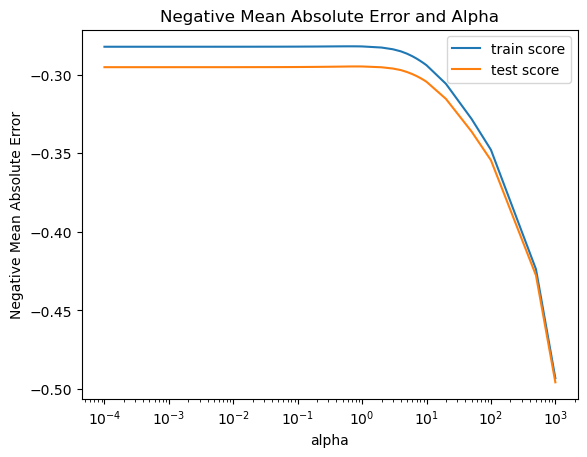

In [261]:
# plotting
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [264]:
# best  hyperparameter
ridge_model.best_params_ 

{'alpha': 0.8}

In [293]:
# fitting model with best parameter
ridge=Ridge(alpha=1.6)
ridge_model=ridge.fit(X_train_new,y_train) 


1.6

In [294]:
#predicting model on X_test
y_pred_ridge=ridge_model.predict(X_test[X_train_new.columns]) 


In [295]:
#r2 score on test data
r2_score(y_true=y_test,y_pred=y_pred_ridge) 


0.8613005770546905

In [296]:
y_pred_train = ridge_model.predict(X_train_new)


print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_ridge)))

RMSE train: 0.4075769168392997
R2 score Train: 0.8338810568597705


RMSE test: 0.38898984552361937
R2 score test: 0.8613005770546905


In [297]:
#ridge model coefficients
ridge_model.coef_ 

array([ 0.38177973, -0.36120624,  0.54896362,  0.48246223,  0.30141373,
        0.42836415,  0.25845803,  0.52764112,  0.26235113,  0.39600937,
        0.1733146 ,  0.18524781, -0.14901614, -0.60238222, -0.36125736,
        0.23858597,  0.35224118,  0.41474507,  0.30692606,  0.45759988,
        0.65376349,  0.91516274,  1.24028463])

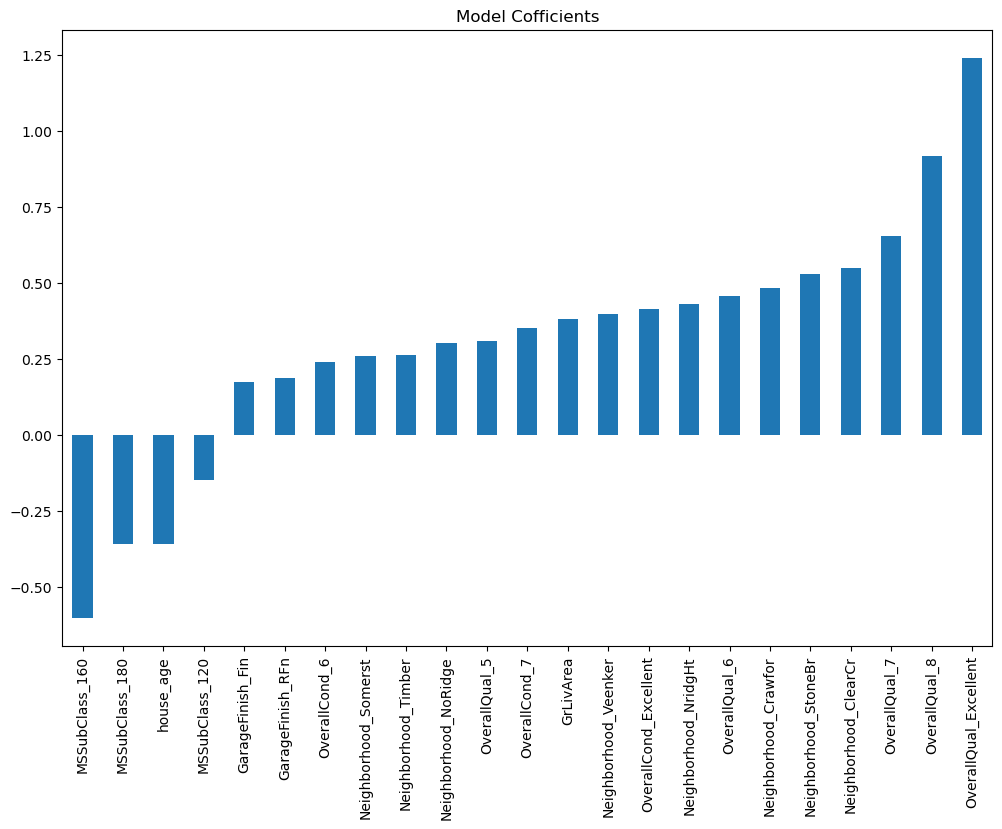

In [299]:
plt.figure(figsize=(12,8))
pred = X_train_new.columns
coef = pd.Series(ridge_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")
plt.show()

In [300]:
ridge_model_parameter = list(ridge_model.coef_)
ridge_model_parameter.insert(0,ridge_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
22,OverallQual_Excellent,0.915163
21,OverallQual_8,0.653763
3,Neighborhood_Crawfor,0.548964
8,Neighborhood_Timber,0.527641
4,Neighborhood_NoRidge,0.482462
20,OverallQual_7,0.457600
6,Neighborhood_Somerst,0.428364
18,OverallQual_5,0.414745
10,GarageFinish_Fin,0.396009
1,house_age,0.381780


Above are the top 10 parameters that explain the best Ridge model


Text(0, 0.5, 'Housing Price Predictions')

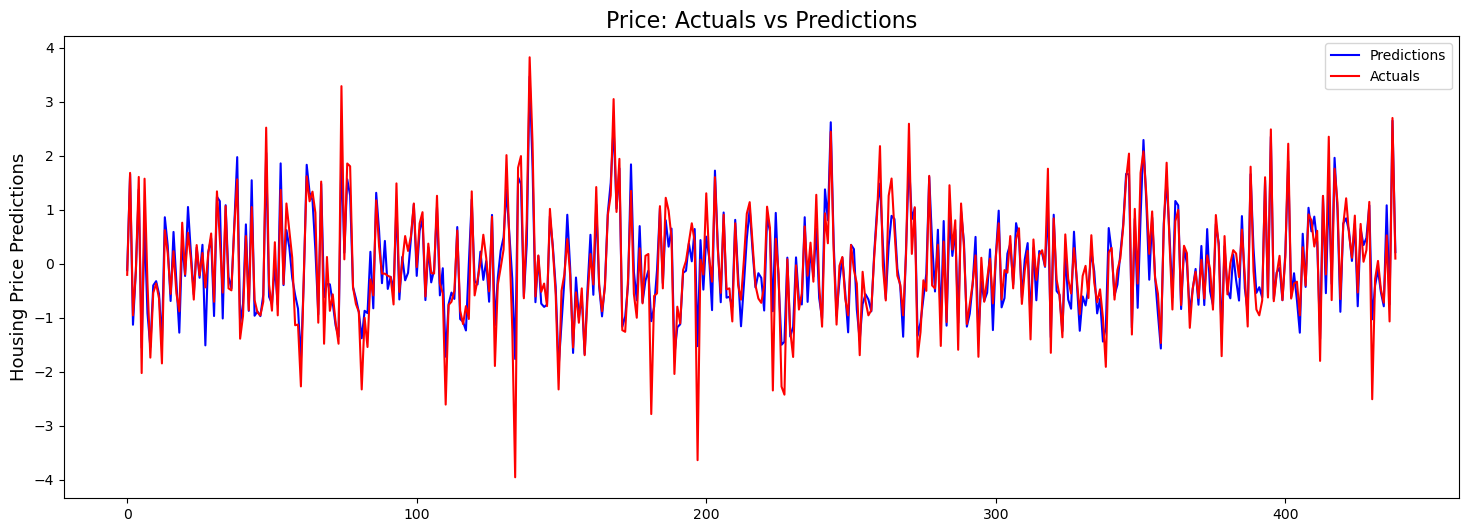

In [301]:
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_ridge)),y=y_pred_ridge,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_ridge)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
# Actual vs Predicted
ax.set_ylabel('Housing Price Predictions',fontsize=13) 


## LASSO Model

In [274]:
lasso = Lasso() # applying Lasso

# cross validation
model_lasso = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)            

model_lasso.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [275]:
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008190,0.001171,0.003978,0.000904,0.0001,{'alpha': 0.0001},-0.275584,-0.347552,-0.311866,-0.295565,...,-0.295203,0.034288,1,-0.286880,-0.267605,-0.280762,-0.280834,-0.294822,-0.282180,0.008924
1,0.007715,0.002037,0.003468,0.001012,0.001,{'alpha': 0.001},-0.275871,-0.351599,-0.312125,-0.294184,...,-0.295554,0.035955,2,-0.286369,-0.268886,-0.280224,-0.281160,-0.294543,-0.282236,0.008390
2,0.005386,0.001851,0.003391,0.000798,0.01,{'alpha': 0.01},-0.300678,-0.401693,-0.347195,-0.316717,...,-0.327193,0.044878,3,-0.320654,-0.308713,-0.317089,-0.317674,-0.328384,-0.318503,0.006337
3,0.006387,0.000801,0.003586,0.001346,0.05,{'alpha': 0.05},-0.366172,-0.473977,-0.412566,-0.405684,...,-0.403794,0.040718,4,-0.409915,-0.376630,-0.400833,-0.398444,-0.410277,-0.399220,0.012249
4,0.005631,0.001370,0.003316,0.000995,0.1,{'alpha': 0.1},-0.379733,-0.468697,-0.430604,-0.409275,...,-0.411560,0.035820,5,-0.417978,-0.381711,-0.411287,-0.406805,-0.417267,-0.407010,0.013296


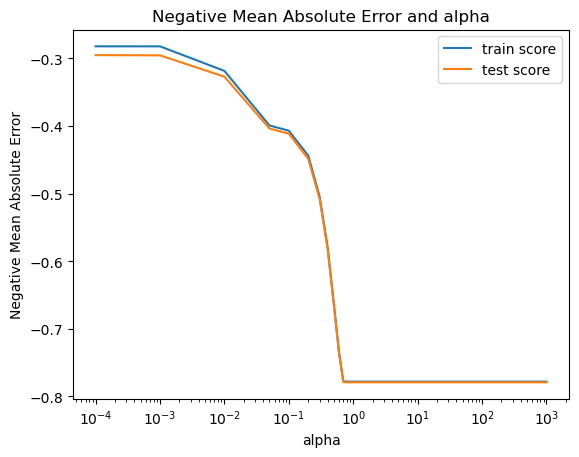

In [276]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [302]:
# best hyperparameter
model_lasso.best_params_ 


{'alpha': 0.0001}

In [304]:
#fit model on alpha = 0.0001
lasso=Lasso(alpha=0.0002)
lasso_model=lasso.fit(X_train_new,y_train) 


In [305]:
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
# r2 on test data
r2_score(y_true=y_test,y_pred=y_pred_lasso) 


0.8614742032211204

In [306]:
# coeffiecients
lasso_model.coef_ 

array([ 0.36564161, -0.35115655,  0.60131079,  0.49114183,  0.31818996,
        0.42214915,  0.25880346,  0.5522632 ,  0.26801842,  0.44805116,
        0.15920698,  0.17753447, -0.16773843, -0.62291655, -0.38422585,
        0.23960348,  0.34740319,  0.40449791,  0.36568021,  0.53080176,
        0.74529406,  1.02174463,  1.39914285])

In [307]:
y_pred_train = ridge_model.predict(X_train_new)
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.4075769168392997
R2 score Train: 0.8338810568597705


RMSE test: 0.3887462974107025
R2 score test: 0.8614742032211204


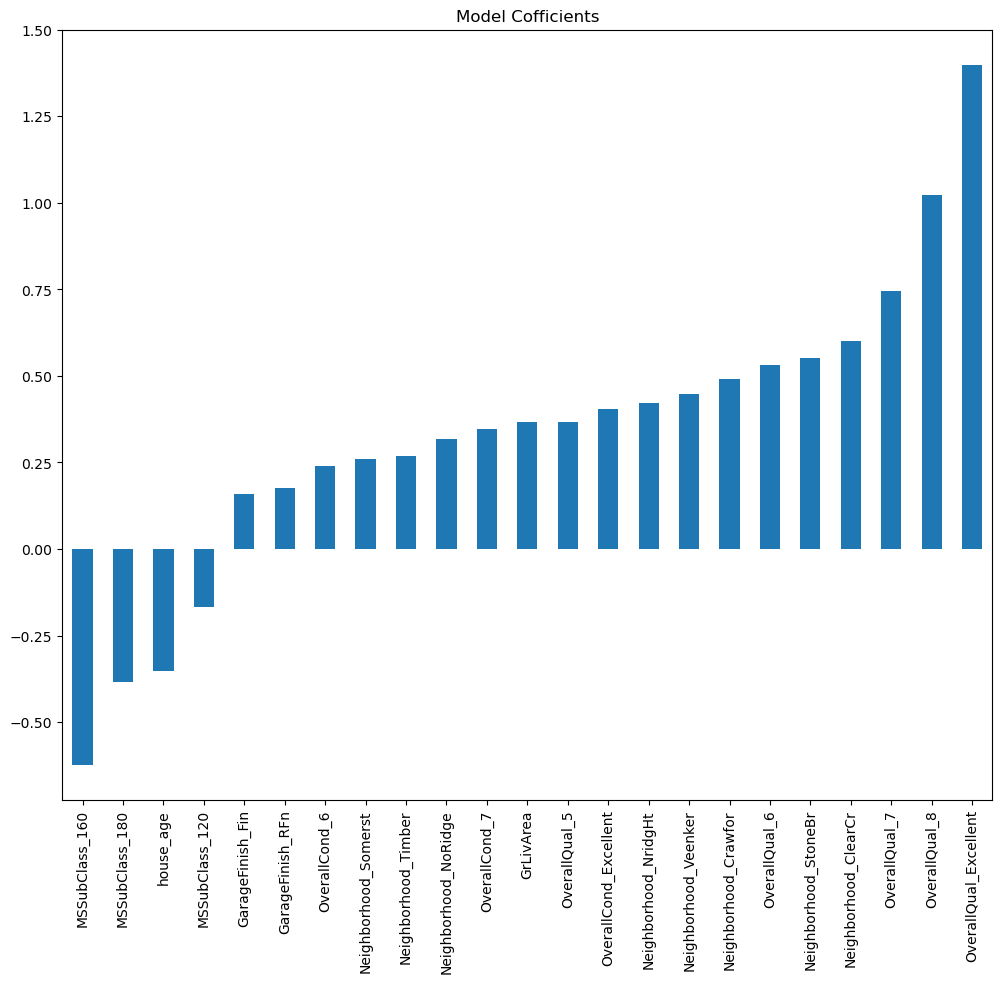

In [308]:
plt.figure(figsize=(12,10))
pred = X_train_new.columns
coef = pd.Series(lasso_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")
plt.show()

When we set alpha to 0.0001 in Lasso regression, the model essentially performs feature selection by driving some of the coefficients to exactly zero. 

Surprisingly, even with this feature selection, the model achieves a high R-squared (r2) score on the test data when alpha is set to 0.0001. 

Consequently, we decide to use this optimal parameter setting to make predictions with the final model.

In [309]:
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
22,OverallQual_Excellent,1.021745
21,OverallQual_8,0.745294
3,Neighborhood_Crawfor,0.601311
8,Neighborhood_Timber,0.552263
20,OverallQual_7,0.530802
4,Neighborhood_NoRidge,0.491142
10,GarageFinish_Fin,0.448051
6,Neighborhood_Somerst,0.422149
18,OverallQual_5,0.404498
19,OverallQual_6,0.365680


In [310]:
#fitting model on best parameter
lasso=Lasso(alpha=0.01) 
lasso_model=lasso.fit(X_train_new,y_train)

In [285]:
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
r2_score(y_true=y_test,y_pred=y_pred_lasso)

0.8206585258129508

In [286]:
# coefficients
lasso_model.coef_ 


array([ 0.47866351, -0.40230957,  0.        ,  0.25532333,  0.        ,
        0.10369142,  0.        ,  0.        ,  0.        ,  0.        ,
        0.16294007,  0.16397   ,  0.        , -0.30282033, -0.        ,
        0.10360167,  0.24333765,  0.26761369, -0.        ,  0.04794331,
        0.17919608,  0.49629613,  0.64166249])

In [287]:
y_pred_train = ridge_model.predict(X_train_new)
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.40676359330377215
R2 score Train: 0.8345433791626035


RMSE test: 0.4423248153627057
R2 score test: 0.8206585258129508


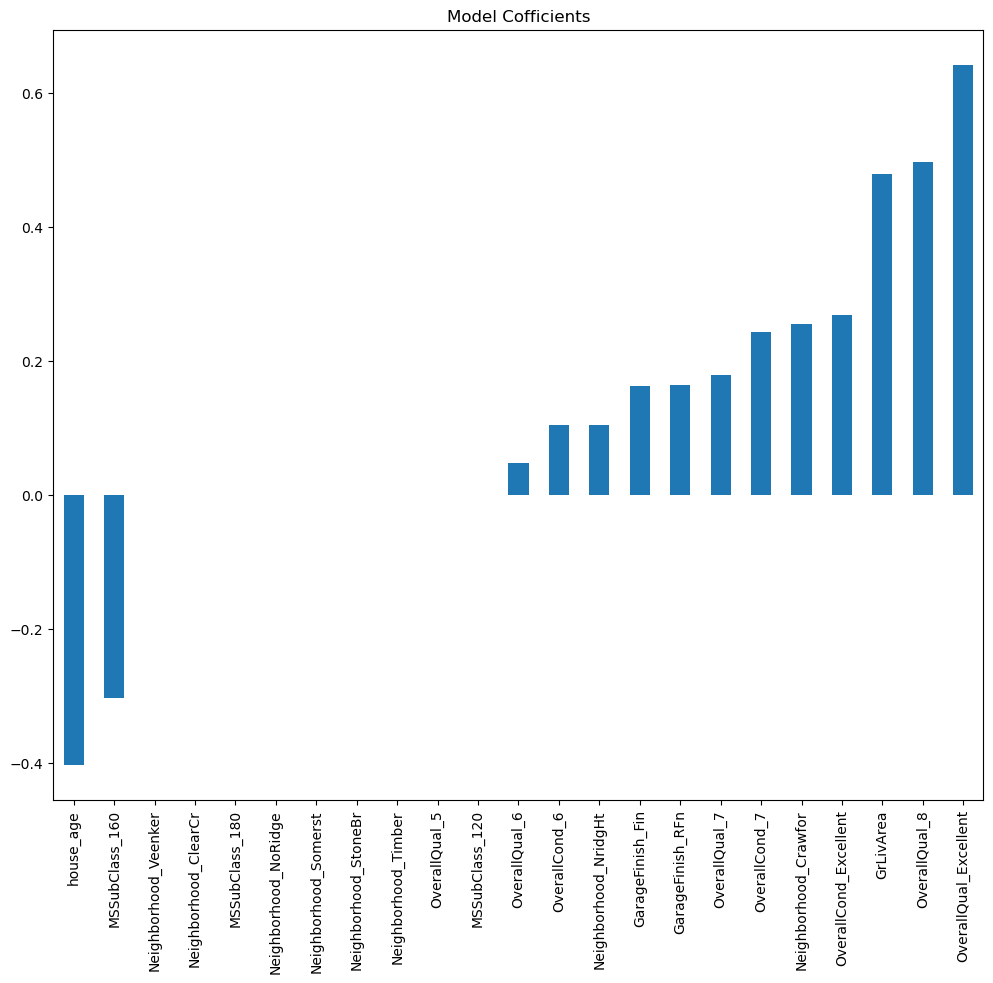

In [288]:
plt.figure(figsize=(12,10))
pred = X_train_new.columns
coef = pd.Series(lasso_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")
plt.show()

In [289]:
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
22,OverallQual_Excellent,0.496296
1,house_age,0.478664
18,OverallQual_5,0.267614
4,Neighborhood_NoRidge,0.255323
17,OverallCond_Excellent,0.243338
21,OverallQual_8,0.179196
12,MSSubClass_120,0.163970
11,GarageFinish_RFn,0.162940
6,Neighborhood_Somerst,0.103691
16,OverallCond_7,0.103602


Above are the top 10 parameters that explain the best lasso model


Text(0, 0.5, 'Housing Price Predictions')

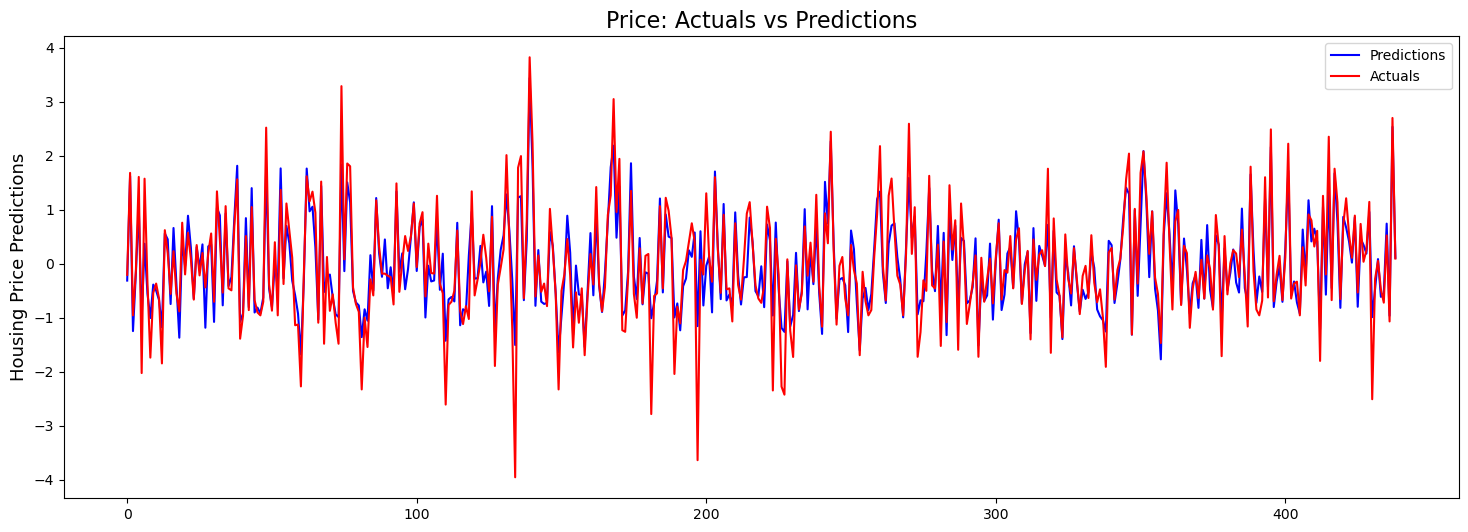

In [290]:
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_ridge)),y=y_pred_lasso,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_ridge)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Housing Price Predictions',fontsize=13)

## SUMMARY

In conclusion, we have chosen the Ridge model with the optimal hyperparameter alpha = 0.8. The R-squared (r2) score on the test data is 0.861, indicating that the model explains 86.1 percent of the variance in the data.

We favored Ridge over Lasso because, with the best value of alpha, the Lasso model did not force any of the coefficients to zero, failing to perform feature selection. Furthermore, the final Lasso model did not provide computational efficiency benefits. Therefore, we have opted for Ridge Regression.

The key parameters that most significantly contribute to both the Lasso and Ridge models are as follows:

1. Neighborhood_NoRidge
2. Neighborhood_Somerst
3. OverallQual_5
4. OverallQual_8
5. OverallQual_Excellent
